# Task-02

Task: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
#Loading the Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the train and test datasets
train = pd.read_csv(r"C:\Users\hp\Downloads\titanic\train.csv")
test = pd.read_csv(r"C:\Users\hp\Downloads\titanic\test.csv")

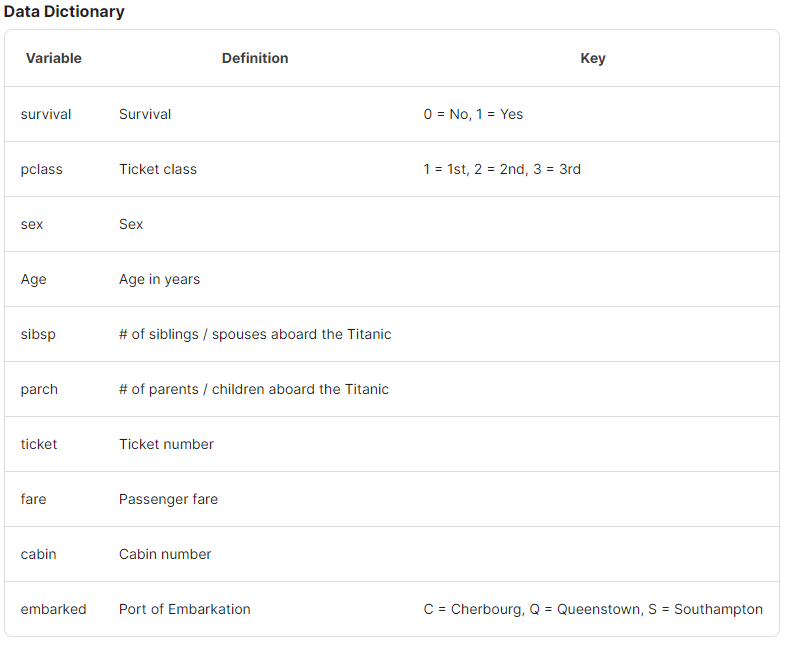

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()
# Here we don't have info. of passenger survival

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### EDA - Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age column - Float - It may be that the age might be in year with date and month 

In [6]:
#Statistical Distribution of Continuous Numerical Value
#Helps to understand the distribution of the data across each features, understand some statistical charateristics, outliers,etc.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Fare- Mean value(32) but we can see max value(512) which is far away from it's mean value, also some fare are zero so there are multiple outliers not only in the fare column but also in multiple columns

In [7]:
# Missing Values
# Helpful when we are building some predictive models, it could result in bad prediction if present
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Checking the survival rate between male and female
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


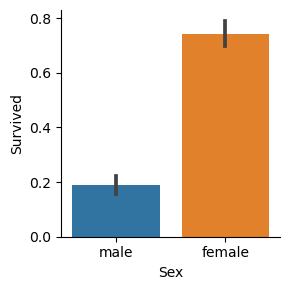

In [10]:
#Plotting the survival rate between male and female
sns.catplot(x="Sex", y ="Survived", data=train, kind="bar", height=3)
plt.show()

* Female - Has higher probability of survival
* Male - Has lower probability of survival

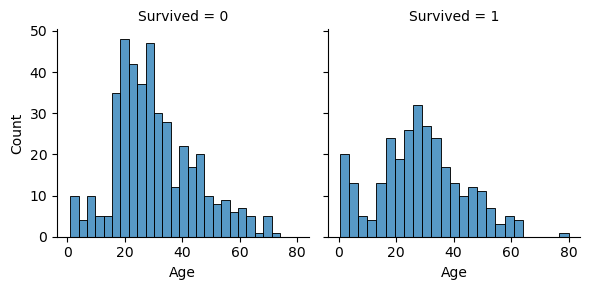

In [11]:
# Plot and see how the age affects the survival chances
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

* Left Graph - Survived =0 --> We can see max. number of people in the age group between 18-38 years didn't survived, whereas
* Right Graph - Survived =1 --> We can see less number of people in the age group between 18-38 survived

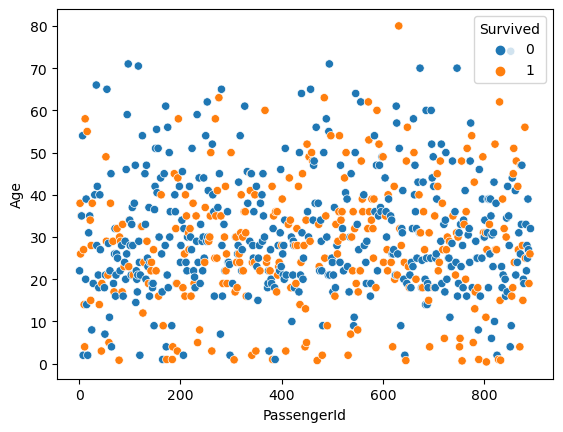

In [12]:
# Plotting the same with the scatter plot
sns.scatterplot(x = train.PassengerId, y = train['Age'], hue = train['Survived'])
plt.show()

* Childrens having Age < 10 with orange dots can be seen survived more as compared to not survived
* Middle age groups, many of them not survived as lot's of blue dots can be seen 
* Ages above 50 also has the higher survival chances 
* So, overall rather than seeing the age column as continuous numeric variable if we try to bucket them into different categories of ae we can make a meaningful insights for prediction of survival 

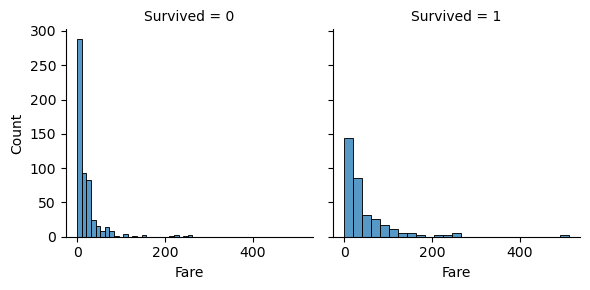

In [13]:
# Plot and see how the fare affects the survival chances
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

* There are few outliers in the right side graph
* Left side graph - Not enough data for fare more than 100, aslo less fare means very low probability of survival 
* So better to bucket the data in the range 0-100 and more than 100 as outliers and see for any patterns

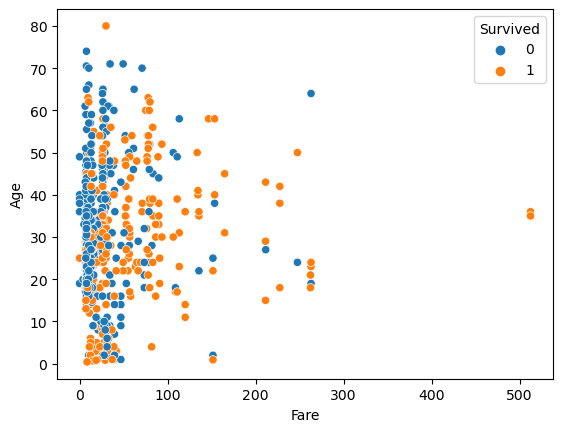

In [14]:
# Plot and see how the Fare and Age combination goes with survival 
sns.scatterplot(x = train.Fare, y = train['Age'], hue = train['Survived'])
plt.show()

* Majority of the people had the fare < 100
* Higer Fare higher the chnces of survival  

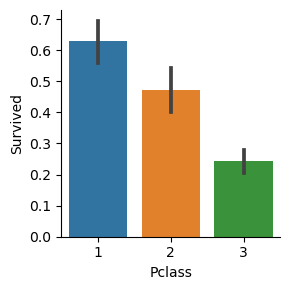

In [15]:
# Checking the relationship between Passenger class and survival
sns.catplot(x="Pclass", y ="Survived", data=train, kind="bar", height=3)
plt.show()

* Passenger Travelling in 1st class - Higher chances of survival over 60%
* Passenger Travelling in 3rd class - Lower chances of survival < 25%
* Note - We plot the each class with considering all total passenger in each class which doesnot make any sense to understand the trends so we will bifurcate the count in each class  

In [16]:
train[["Survived", "Pclass"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Survived', ylabel='count'>

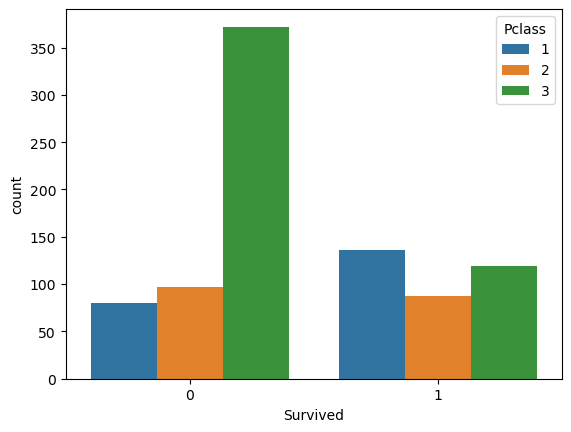

In [17]:
# Polt the count of people who travelled on different classes
sns.countplot(x='Survived',hue='Pclass',data=train)

In [18]:
train[["Survived", "Pclass"]].groupby(["Pclass","Survived"], as_index = False).value_counts()

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


* Not Survived - Count of passengers travelling in 1st class is not significantly low but passengers travelling in 3rd class is 4x more
* Survived - Passengers travelling in all classes have almost equal count

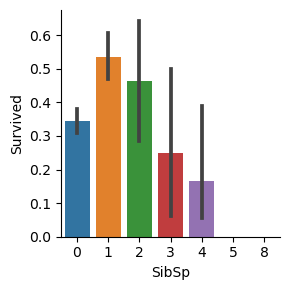

In [19]:
# Plotting the relationship beween the survival of people having siblings and spouses with them
sns.catplot(x="SibSp", y ="Survived", data=train, kind="bar", height=3)
plt.show()

In [20]:
train[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* Whether the person travelling with more family members survived or not ?
    - Apart from self i.e 0, the person travelling one or two(sibling or spouse) have higher prob. of survival and it gets decreasing with larger family members accompanied.

In [21]:
# Checking the relationship beween the survival of parents and childrens
train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])

Survived          
         count      mean
Parch                   
0          678  0.343658
1          118  0.550847
2           80  0.500000
3            5  0.600000
4            4  0.000000
5            5  0.200000
6            1  0.000000

* When passenger travelled alone its prob. of survival is 34% which matches with the previous plot
* Whereas people with family size = 4 has 0% prob. and it keeps on decreasing with increase in number of large family members

In [22]:
# Checking the survival chances of people who boarded the ship on different location
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

* Majority of people have board from Southampton and they had the least prob. of survival with 33% 

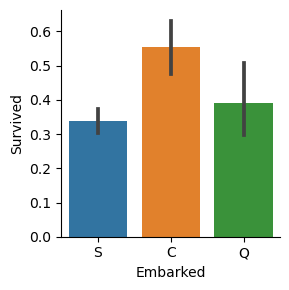

In [23]:
# Plotting the graph for above code
sns.catplot(x="Embarked", y ="Survived", data=train, kind="bar", height=3)
plt.show()

### Multivariate Analysis

In [24]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [25]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Transformation to Features or Data Preprocessing

In [26]:
#Before changing to numerical
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [27]:
#Convert caterogical data to numerical
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [28]:
#Cross-check after changing to numerical
train.Sex.unique()

array([0, 1], dtype=int64)

In [29]:
#Before changing to numerical
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [30]:
#Convert caterogical data to numerical
embark = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)

In [31]:
#Cross-check after changing to numerical
test.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [32]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)    #earlier we found one value as NaN in the test dataset so we replace with 0
    dataset['Fare'] = dataset['Fare'].astype(int)  #convert float to int

* Since we have only one record found as NaN in test dataset we would replace with the 0, but if we want to be more accurate what we can do is first check the age, class of the particular and then do the groupby of that range of age and class and find the mean, average and then replace that will the NaN value

### Handling the missing value

In [33]:
#Check number of records for NaN value for the age column
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0


In [34]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train = train.drop(['Name'], axis=1)  
test = test.drop(['Name'], axis=1) 

In [35]:
#Combine the train and test data together
data_train_test = pd.concat([train.assign(ind="train"), test.assign(ind="test")], ignore_index=True)

* adds a new column called 'ind' and assigns the string value "train", "test" to all rows in that column.
* The final result, data_train_test, is a DataFrame that combines the rows of the train and test datasets, and a new column 'ind' is added to identify whether each row belongs to the training or testing dataset

In [36]:
#Check the ind column in the last
data_train_test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind
0,1,0.0,3,0,22.0,1,0,A/5 21171,7,NaN,0.0,1.0,train
1,2,1.0,1,1,38.0,1,0,PC 17599,71,C85,1.0,3.0,train
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7,NaN,0.0,2.0,train
3,4,1.0,1,1,35.0,1,0,113803,53,C123,0.0,3.0,train
4,5,0.0,3,0,35.0,0,0,373450,8,NaN,0.0,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,NaN,0,0,A.5. 3236,8,NaN,0.0,1.0,test
1305,1306,NaN,1,1,39.0,0,0,PC 17758,108,C105,1.0,0.0,test
1306,1307,NaN,3,0,38.5,0,0,SOTON/O.Q. 3101262,7,NaN,0.0,1.0,test
1307,1308,NaN,3,0,NaN,0,0,359309,8,NaN,0.0,1.0,test


In [37]:
# This code is subset of below code to cross check what is the output for the code
age_nan_pos = data_train_test[data_train_test["Age"].isnull()].index  
age_nan_pos

Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
       ...
       1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
      dtype='int64', length=263)

In [38]:
age_nan_pos = data_train_test[data_train_test["Age"].isnull()].index     # get the index position of the age row with NaN value 
for i in age_nan_pos:
    mean_age = data_train_test["Age"][((data_train_test["Title"] == data_train_test.iloc[i]["Title"]))].mean()
    data_train_test["Age"].iloc[i] = mean_age

* the code identifies rows with missing values in the "Age" column, calculates the mean age for rows with the same "Title," and fills in the missing "Age" values with the calculated means.


In [39]:
# Cross check whether the NaN are replaced
age_nan_pos = data_train_test[data_train_test["Age"].isnull()].index  
age_nan_pos

Index([], dtype='int64')

In [40]:
#Splitting into two datasets "test" and "train" based on the values of "ind" column
test, train = data_train_test[data_train_test["ind"].eq("test")], data_train_test[data_train_test["ind"].eq("train")]

### Reason to concat the train and test data and replace the NaN with mean value and then split into two seperate dataset again is to maintain the uniformity in both dataset which will help while building the prediction model

In [41]:
#Recheck whether Null values present
train[train["Age"].isnull()]

# no null values present

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind


In [42]:
#Split the age in ranges and then convert numerical to categorical values

data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4


In [43]:
train.Age.unique()

array([1, 2, 3, 0, 4])

In [44]:
#Dropping the invaluable columns
train.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)
test.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,1,1,0,7,0.0,1.0
1,2,1.0,1,1,2,1,0,71,1.0,3.0
2,3,1.0,3,1,1,0,0,7,0.0,2.0
3,4,1.0,1,1,2,1,0,53,0.0,3.0
4,5,0.0,3,0,2,0,0,8,0.0,1.0


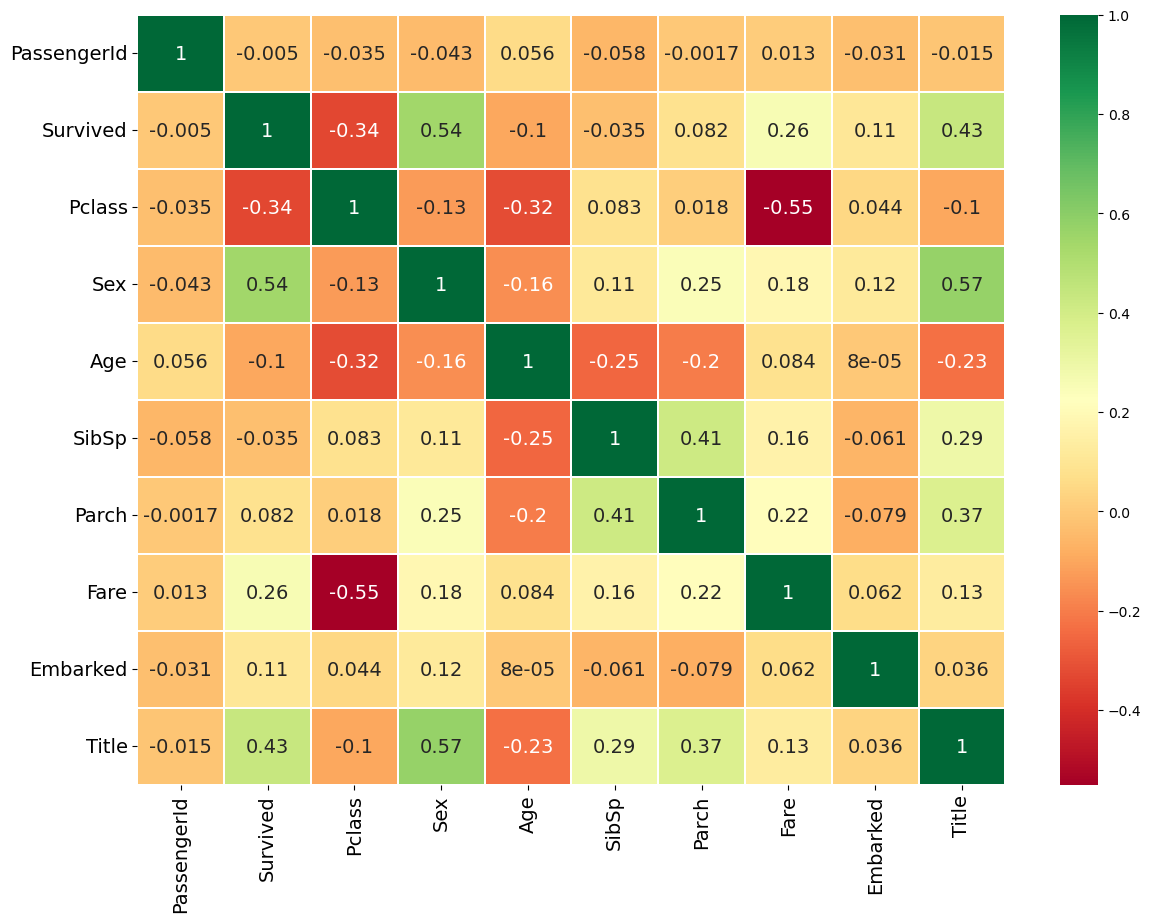

In [46]:
#Plotting the correlation matrix
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Fare vs Pclass - Negatively correlated - means as class increases the fare decreases
* Sex (1-Female) vs survived - Positive correlated - means female had higher probability of survival 

#### Creating new features

In [47]:
# Adding the Sibbling/ Spouse and Parent/ Child column to find the total size of family
data = [train, test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [48]:
#Checking for new column FamilySize
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0.0,3,0,1,1,0,7,0.0,1.0,2
1,2,1.0,1,1,2,1,0,71,1.0,3.0,2
2,3,1.0,3,1,1,0,0,7,0.0,2.0,1
3,4,1.0,1,1,2,1,0,53,0.0,3.0,2
4,5,0.0,3,0,2,0,0,8,0.0,1.0,1


In [49]:
#Check the count of each family with different size
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = False).agg(['count','sum', 'mean'])

Survived                 
              count    sum      mean
FamilySize                          
1               537  163.0  0.303538
2               161   89.0  0.552795
3               102   59.0  0.578431
4                29   21.0  0.724138
5                15    3.0  0.200000
6                22    3.0  0.136364
7                12    4.0  0.333333
8                 6    0.0  0.000000
11                7    0.0  0.000000

* People travelling alone have lower prob. of around 30%
* Prob. of survival increases with increase in no. of family size upto 4 members, but again drops drastically as members increases.
* Whereas people travel with family size of 4 members has the highest prob. of 72%

In [50]:
# Spliting the fare into 13 parts and assign them numerical values as the fare column had majority of values below 100 
data = [train, test]
for dataset in data:
    dataset['Fare'], bins = pd.qcut(dataset['Fare'], q=13, labels=False, duplicates='drop', retbins=True)
    dataset['Fare'] = dataset['Fare'] + 1  # Adding 1 to start the labels from 1

In [51]:
train.Fare.unique()

array([ 1, 10,  9,  2,  6,  4,  8,  7, 11,  3,  5], dtype=int64)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0.0,3,0,1,1,0,1,0.0,1.0,2
1,2,1.0,1,1,2,1,0,10,1.0,3.0,2
2,3,1.0,3,1,1,0,0,1,0.0,2.0,1
3,4,1.0,1,1,2,1,0,9,0.0,3.0,2
4,5,0.0,3,0,2,0,0,2,0.0,1.0,1
